In [1]:
##e145-r401 and e394-r152 are the state dependent ones

In [2]:
import MDAnalysis as mda
import numpy as np
from MDAnalysis.analysis import distances as d

/home/semccomas/anaconda3/envs/string_method/lib/python3.8/site-packages/MDAnalysis/coordinates/TRJ.py:1209: DeprecationWarning: Please use `netcdf_file` from the `scipy.io` namespace, the `scipy.io.netcdf` namespace is deprecated.
  class NCDFPicklable(scipy.io.netcdf.netcdf_file):


In [3]:
def get_salt_br(u, res1_n, res2_n):
    dists = []
    res1 = u.select_atoms(res1_n)
    res2 = u.select_atoms(res2_n)
    for ts in u.trajectory:
        dists.append(np.min(d.distance_array(res1.positions, res2.positions)))
    return np.array(dists)

In [ ]:
iter_start = 100
iter_end = 745
n=0

salt_br1 = np.zeros((((iter_end-iter_start+1)*14*32),2))
salt_br2 = np.zeros((((iter_end-iter_start+1)*14*32),2))

salt_br_index = 0
swarms_beads_nums = 14*32  #need this for proper indexing


indir = '../../../string_sims/TMD_initial_path/influx_apo_gate_CV/md/'
## always add +1 because we want to include this #, but not get confused
for iteration in np.arange(iter_start, iter_end+1):
    u = mda.Universe(f'{indir}/0/0/restrained/confout.gro',\
                     f'{indir}/{iteration}/{iteration}.all_beads_swarms.xtc')

    out_arr1 = get_salt_br(u, res1_n='resid 145 and resname GLU and name OE1 OE2', \
                           res2_n='resid 401 and resname ARG and name NE HE NH1 NH2 HH11 HH12 HH21 HH22')
    out_arr1 = np.reshape(out_arr1,(-1,2)) ## split into 2d array, every other element

    
    out_arr2 = get_salt_br(u, res1_n='resid 394 and resname GLU and name OE1 OE2', \
                           res2_n='resid 152 and resname ARG and name NE HE NH1 NH2 HH11 HH12 HH21 HH22')
    out_arr2 = np.reshape(out_arr2,(-1,2)) ## split into 2d array, every other element
    
    
    
    ### so first index from start of iteration to end
    ## then go forward by 448 & add next iter to TM10RMSD array
    salt_br1[salt_br_index:salt_br_index+swarms_beads_nums] = out_arr1
    salt_br2[salt_br_index:salt_br_index+swarms_beads_nums] = out_arr2

    salt_br_index = salt_br_index + swarms_beads_nums 
    
    print(iteration)

100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130


In [ ]:
np.save('../../textfiles_out/not_gates_for_MSM/influx_apo_gate_CV.salt_br1.charged.npy', salt_br1)
np.save('../../textfiles_out/not_gates_for_MSM/influx_apo_gate_CV.salt_br2.charged.npy', salt_br2)

In [34]:
453*32*14

202944

In [38]:
salt_br2 = salt_br2[:202944]

In [17]:
atom_sims = ['OUT', 'OUT-OCC', 'OCC', 'IN-OCC', 'IN']

features_sims1 = []
features_sims2 = []
for atom_sim in atom_sims:
    u = mda.Universe(f'../../ref_models_protonly/{atom_sim}.start.protonly.gro')
    temp1=get_salt_br(u,res1_n='resid 145 and resname GLU', res2_n='resid 401 and resname ARG')
    temp2=get_salt_br(u, res1_n='resid 394 and resname GLU', res2_n='resid 152 and resname ARG')

    
    features_sims1.append(temp1)
    features_sims2.append(temp2)

np.save('../../textfiles_out/not_gates_for_MSM/atom_sims.salt_br1.npy', features_sims1)
np.save('../../textfiles_out/not_gates_for_MSM/atom_sims.salt_br2.npy', features_sims2)

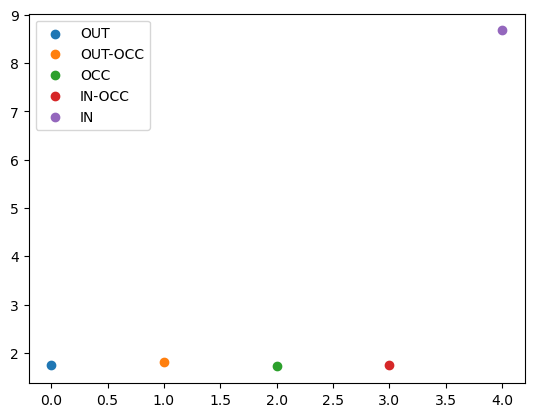

In [18]:
import matplotlib.pyplot as plt
for n,name in enumerate(atom_sims):
    #plt.scatter(n, features_sims1[n], s=40)
    plt.scatter(n,features_sims2[n], label=name)
plt.legend()
#plt.xlim(0.35, 0.90)
#plt.ylim(0.35,0.90)

In [12]:
features_sims2[1]

array([1.80106192])